In [17]:
import pandas as pd 
data = pd.read_csv('mvp_votings1.csv')
data.head(3)

,Unnamed: 0,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,MVP
0,0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,...,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,1
1,1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,...,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,0
2,2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,...,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,0


In [18]:
data.columns

Index(['Unnamed: 0', 'fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
       'season', 'player', 'win_pct', 'votes_first', 'points_won',
       'points_max', 'award_share', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48', 'MVP'],
      dtype='object')

In [19]:
#Logisic Regression Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import statsmodels.api as sm
X = data[['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
     'win_pct', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48']]
Y= data['MVP']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter = 1000)

model.fit(X_train, Y_train)

X_train_with_const = sm.add_constant(X_train) 
logit_model = sm.Logit(Y_train, X_train_with_const)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.079333
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                    MVP   No. Observations:                  509
Model:                          Logit   Df Residuals:                      488
Method:                           MLE   Df Model:                           20
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.6276
Time:                        16:12:35   Log-Likelihood:                -40.381
converged:                       True   LL-Null:                       -108.42
Covariance Type:            nonrobust   LLR p-value:                 2.791e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -153.4205     59.921     -2.560      0.010    -270.863     -35.978
fga            1.9219      1

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy Score:", accuracy)
from sklearn.metrics import mean_squared_error

predicted_probabilities = model.predict_proba(X_test)[:, 1]
rmse = np.sqrt(mean_squared_error(Y_test, predicted_probabilities))
print("RMSE:", rmse)
r2 = r2_score(Y_test, predictions)
print("R-squared (R2):", r2)

Accuracy Score: 0.953125
RMSE: 0.20656493932020248
R-squared (R2): 0.3491525423728814


In [5]:
test_data = pd.read_csv('test_data.csv')
test_data = test_data.dropna()

X_test_data = test_data[['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
                          'win_pct', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
                          'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
                          'ws', 'ws_per_48']]

predictions_test_data = model.predict(X_test_data)

test_data['Predicted_MVP_Prob'] = model.predict_proba(X_test_data)[:, 1]
sorted_test_data = test_data.sort_values(by='Predicted_MVP_Prob', ascending=False)

print("Test Data with Predicted MVP Probabilities:")
print(sorted_test_data[['player', 'Predicted_MVP_Prob']])


Test Data with Predicted MVP Probabilities:
                   player  Predicted_MVP_Prob
1   Giannis Antetokounmpo            0.324981
0            James Harden            0.241427
5            Nikola Jokic            0.110916
6            Kevin Durant            0.048439
38      Russell Westbrook            0.043164
3          Damian Lillard            0.037401
15           Kyrie Irving            0.030731
9          Nikola Vucevic            0.024007
18            Joel Embiid            0.017025
11          Stephen Curry            0.013253
8      Karl-Anthony Towns            0.009148
4             Paul George            0.005608
22          Blake Griffin            0.004638
28       Domantas Sabonis            0.004124
21           Eric Bledsoe            0.003354
30             Al Horford            0.003337
12          Kawhi Leonard            0.003237
14      LaMarcus Aldridge            0.003071
13          Pascal Siakam            0.002616
26           Jusuf Nurkic           

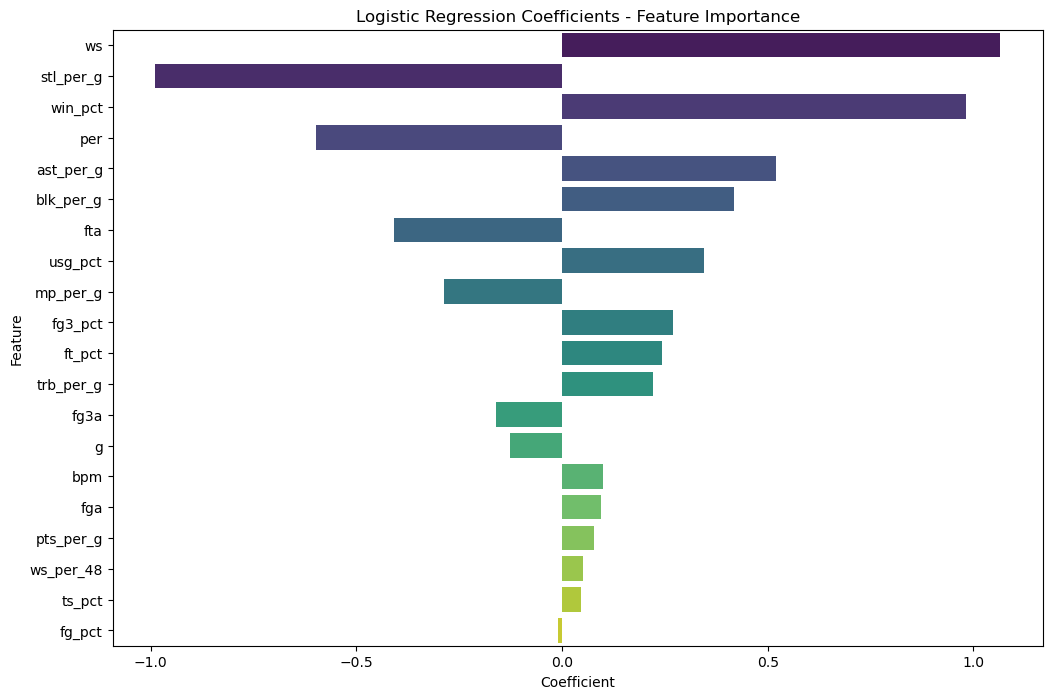

In [26]:
coefficients = model.coef_[0]
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Logistic Regression Coefficients - Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [22]:
#Data Frame of only MVP's
mvp_winners_df = data[data['MVP'] == 1]

mvp_winners_df.head()


,Unnamed: 0,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,MVP
0,0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,...,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,1
31,31,22.5,0.1,10.2,26.8,0.576,29.9,4.3,1981-82,Moses Malone,...,14.7,1.8,0.9,1.5,0.519,0.000,0.762,15.4,0.218,1
56,56,16.7,0.0,10.1,25.1,0.578,26.0,3.4,1982-83,Moses Malone,...,15.3,1.3,1.1,2.0,0.501,0.000,0.761,15.1,0.248,1
79,79,19.5,0.9,5.3,24.2,0.552,26.7,7.8,1983-84,Larry Bird,...,10.1,6.6,1.8,0.9,0.492,0.247,0.888,13.6,0.215,1
94,94,22.0,1.6,5.7,26.5,0.585,28.5,8.5,1984-85,Larry Bird,...,10.5,6.6,1.6,1.2,0.522,0.427,0.882,15.7,0.238,1


In [23]:
#Averages of each Statistical Catagory for Everyone
description = data.describe()
print(description)

       Unnamed: 0         fga        fg3a         fta         per      ts_pct  \
count  637.000000  637.000000  637.000000  637.000000  637.000000  637.000000   
mean   318.000000   16.493878    1.990738    6.431868   22.451491    0.568061   
std    184.030342    3.885812    2.205053    2.220213    3.731392    0.039137   
min      0.000000    3.700000    0.000000    1.300000   10.100000    0.441000   
25%    159.000000   13.900000    0.100000    4.800000   19.900000    0.542000   
50%    318.000000   16.700000    1.000000    6.200000   22.600000    0.566000   
75%    477.000000   19.100000    3.600000    7.900000   24.700000    0.596000   
max    636.000000   27.800000   11.200000   13.100000   31.700000    0.699000   

          usg_pct        bpm     win_pct  votes_first  ...   trb_per_g  \
count  637.000000  637.00000  637.000000   637.000000  ...  637.000000   
mean    26.456829    4.55573    0.630860     6.362637  ...    7.430298   
std      4.869641    2.69811    0.108075    20.2

In [24]:
#Averages for only MVP's
MVP_description = mvp_winners_df.describe()
print(MVP_description)

       Unnamed: 0        fga       fg3a        fta        per     ts_pct  \
count   38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   
mean   340.526316  19.355263   2.773684   7.889474  27.565789   0.590553   
std    184.854908   3.079812   2.865704   2.034140   2.763886   0.031723   
min      0.000000  11.400000   0.000000   3.200000  22.000000   0.518000   
25%    191.500000  17.350000   0.350000   6.825000  25.375000   0.576000   
50%    351.500000  19.600000   2.300000   8.050000  27.000000   0.588000   
75%    498.750000  21.175000   4.300000   9.875000  29.800000   0.605000   
max    624.000000  25.500000  11.200000  10.500000  31.700000   0.669000   

         usg_pct        bpm    win_pct  votes_first  ...  trb_per_g  \
count  38.000000  38.000000  38.000000    38.000000  ...  38.000000   
mean   30.257895   8.431579   0.748020    78.013158  ...   8.457895   
std     3.974284   2.941328   0.071097    27.776251  ...   3.270311   
min    20.500000   1.700000   0

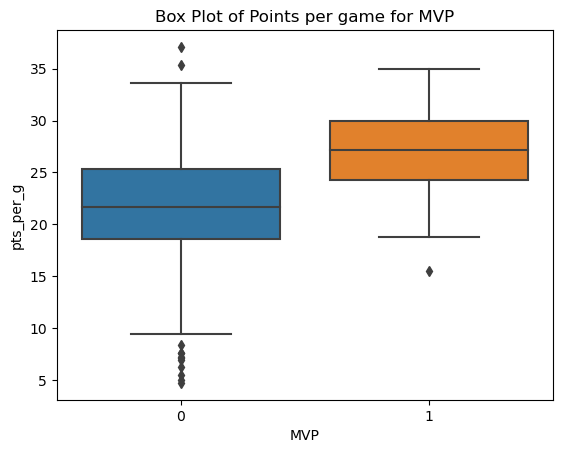

In [27]:
#Points per game of MVP winners vs Non-Winners

pts_column = 'pts_per_g'
mvp_column = 'MVP'
sns.boxplot(x=data[mvp_column], y=data[pts_column])

plt.xlabel(mvp_column)
plt.ylabel(pts_column)
plt.title(f'Box Plot of Points per game for MVP')
plt.show()

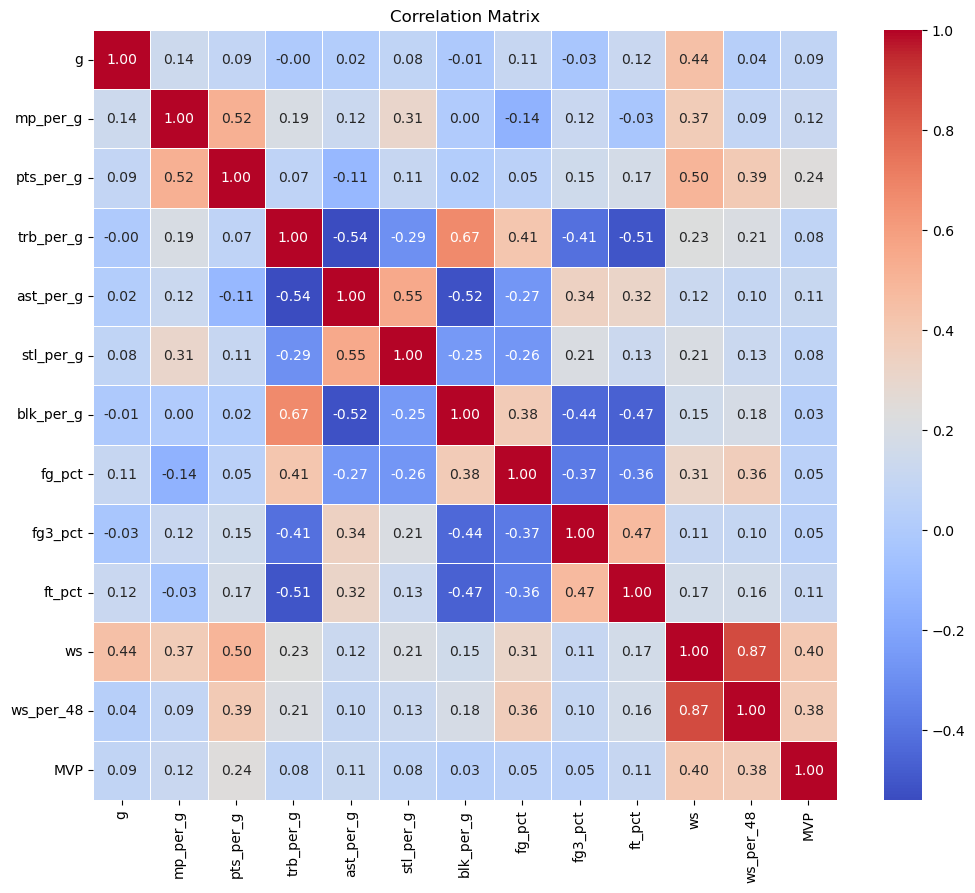

In [28]:
#Correlation Matrix between stats

feature_columns = ['g', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws', 'ws_per_48']
target_variable = 'MVP'

selected_columns = feature_columns + [target_variable]
selected_df = data[selected_columns]

correlation_matrix = selected_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


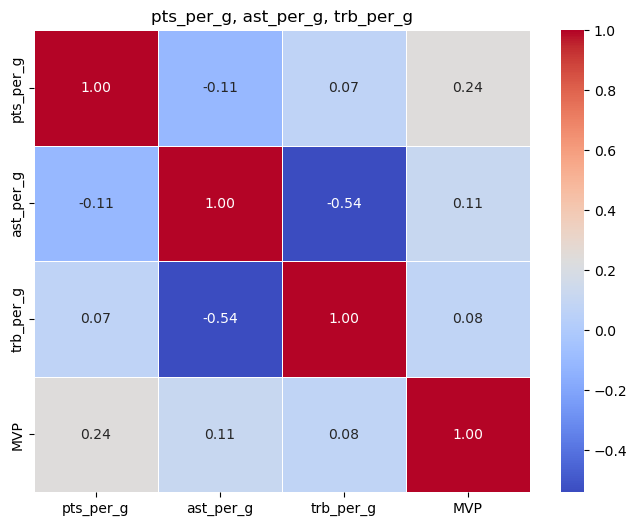

In [16]:
selected_columns = ['pts_per_g', 'ast_per_g', 'trb_per_g', 'MVP']
subset_data = data[selected_columns]

correlation_matrix = subset_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('pts_per_g, ast_per_g, trb_per_g')
plt.show()

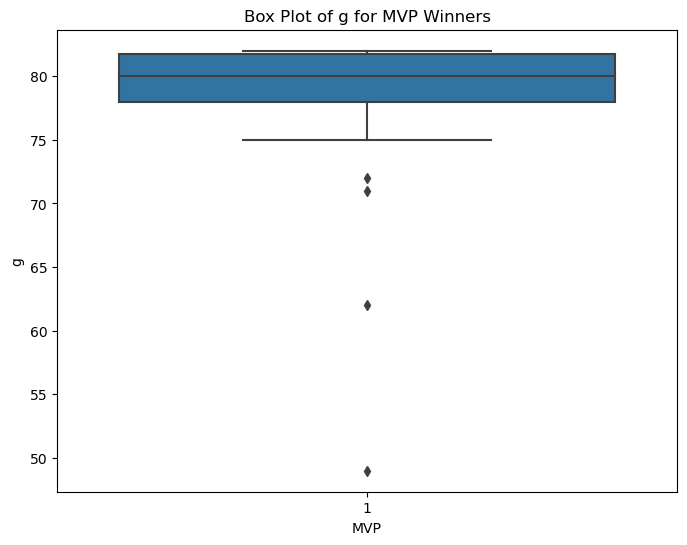

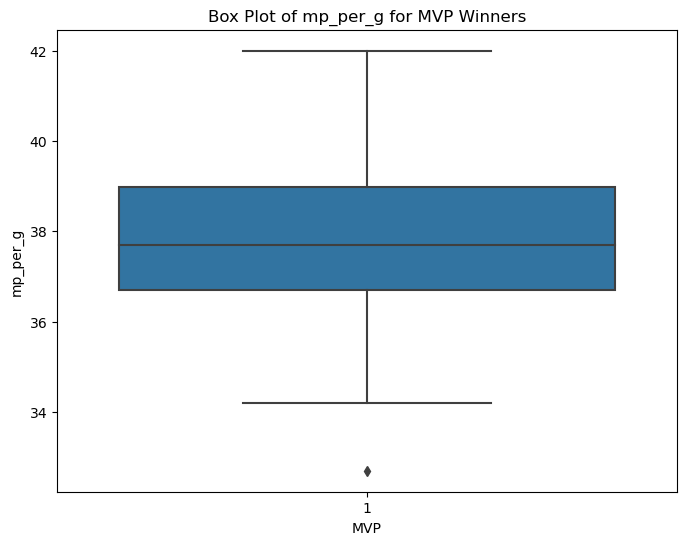

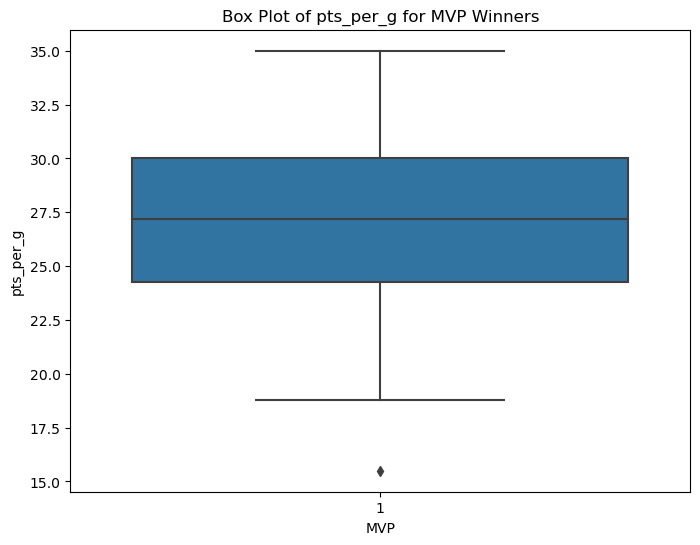

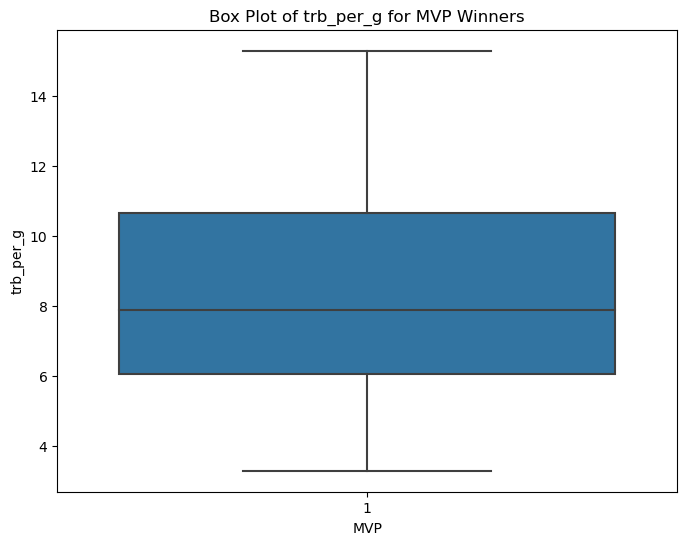

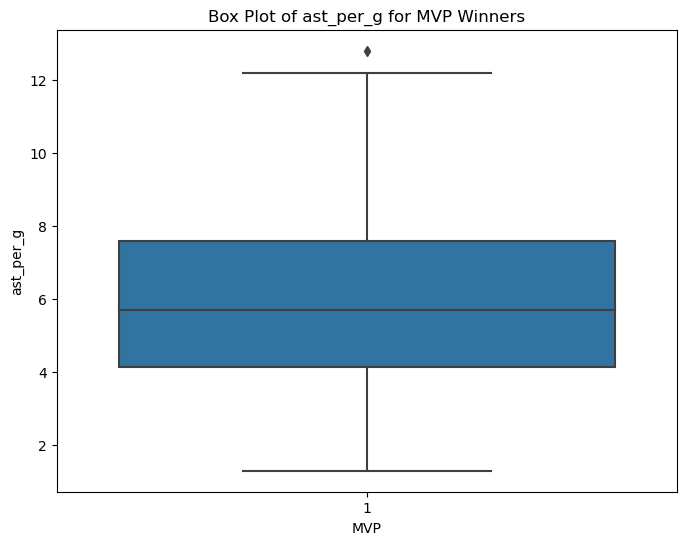

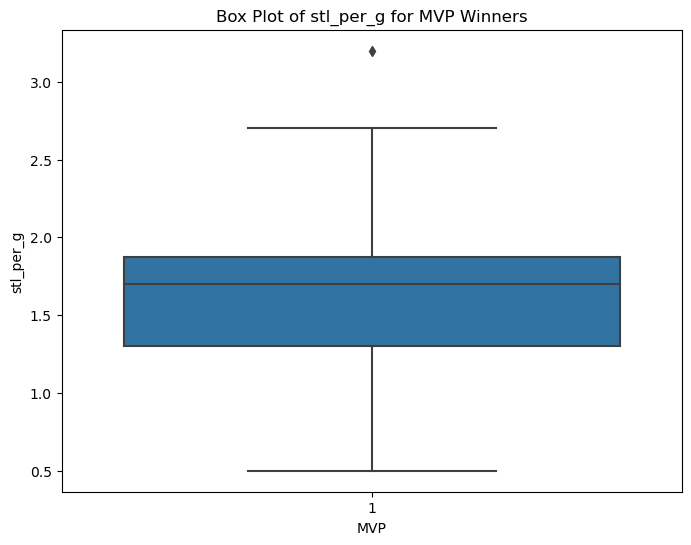

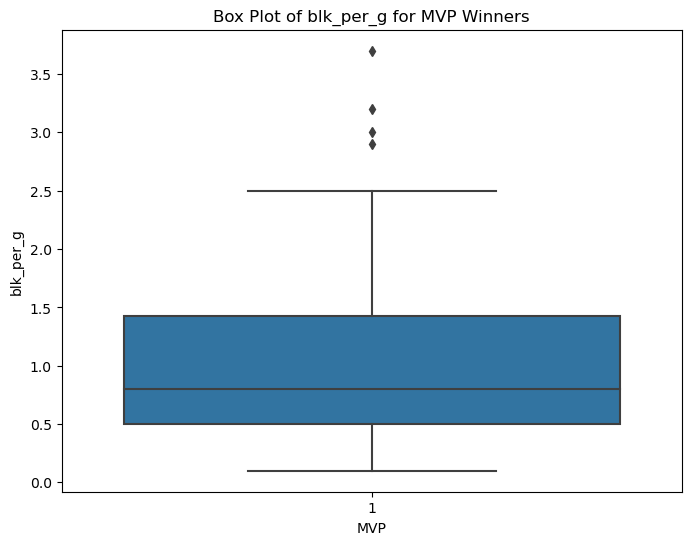

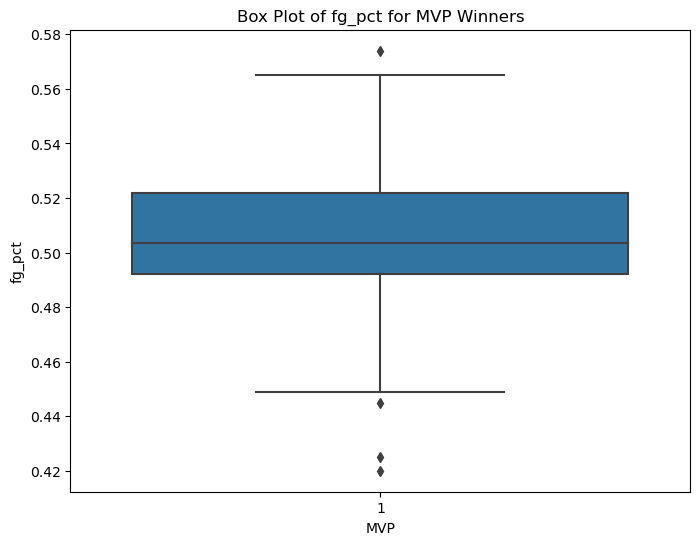

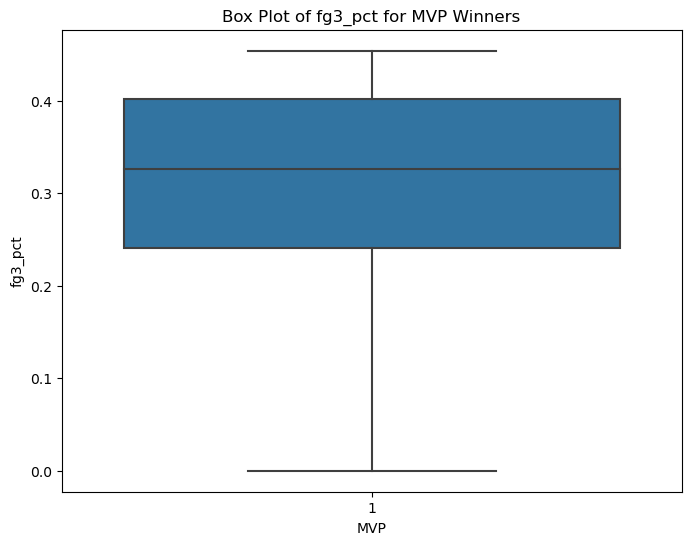

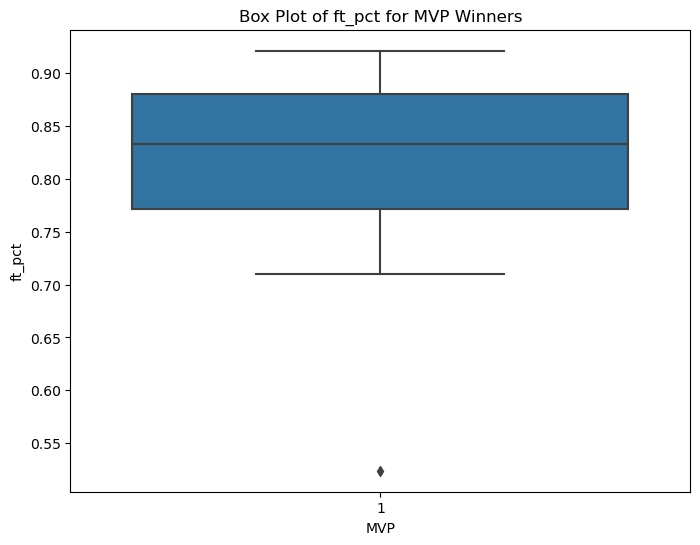

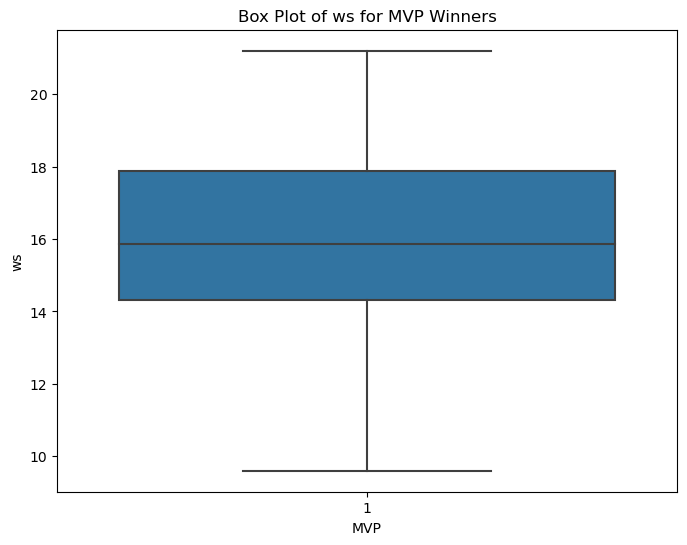

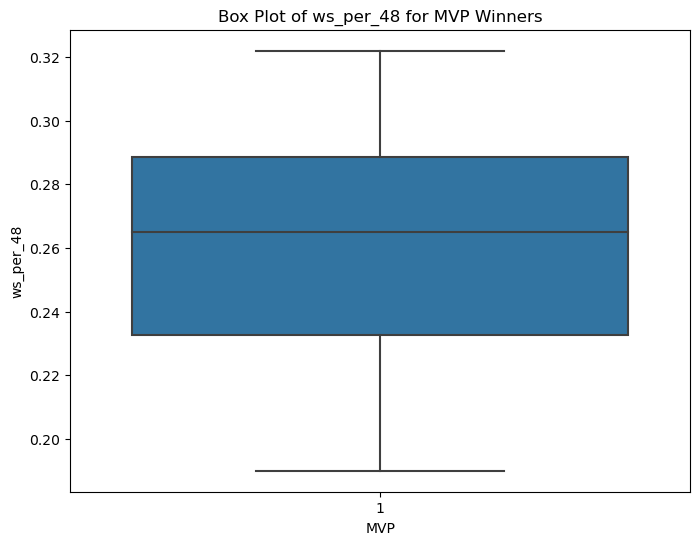

In [29]:
#Averages for each stat for MVP winners 
feature_columns = ['g', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws', 'ws_per_48']

mvp_winners_df = data[data['MVP'] == 1]

for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='MVP', y=feature, data=mvp_winners_df)
    plt.title(f'Box Plot of {feature} for MVP Winners')
    plt.show()

In [21]:
unique_seasons = data['season'].unique()

unique_seasons_list = unique_seasons.tolist()
print(unique_seasons_list)

['1980-81', '1981-82', '1982-83', '1983-84', '1984-85', '1985-86', '1986-87', '1987-88', '1988-89', '1989-90', '1990-91', '1991-92', '1992-93', '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18']


In [30]:
#PPG by player and if they won MVP
max_pts_per_season = []

for season in unique_seasons_list:
    season_df = data[data['season'] == season]
    
    max_pts_row = season_df.loc[season_df['pts_per_g'].idxmax()]
    
    max_pts_info = {
        'Season': season,
        'Player': max_pts_row['player'],
        'PPG': max_pts_row['pts_per_g'],
        'Won MVP?': 'Yes' if max_pts_row['MVP'] == 1 else 'No'
    }
    
    max_pts_per_season.append(max_pts_info)

max_pts_per_season_df = pd.DataFrame(max_pts_per_season)

print(max_pts_per_season_df)


NameError: name 'unique_seasons_list' is not defined

In [31]:
#PPG by player and if they won MVP

import pandas as pd


usage = []

for season in unique_seasons_list:
    season_df = data[data['season'] == season]
    
    usage_pct = season_df.loc[season_df['usg_pct'].idxmax()]
    
    max_pts_info = {
        'Season': season,
        'Player': usage_pct['player'],
        'Usage': usage_pct['usg_pct'],
        'Won MVP?': 'Yes' if usage_pct['MVP'] == 1 else 'No'
    }
    
    usage.append(max_pts_info)

usage_df = pd.DataFrame(usage)

print(usage_df)


NameError: name 'unique_seasons_list' is not defined

In [32]:
#KNN 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data[['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
     'win_pct', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48']]
y= data['MVP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9296875
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       118
           1       0.57      0.40      0.47        10

    accuracy                           0.93       128
   macro avg       0.76      0.69      0.72       128
weighted avg       0.92      0.93      0.92       128

Confusion Matrix:
 [[115   3]
 [  6   4]]


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = data[['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
     'win_pct', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48']]
y= data['MVP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9453125
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       118
           1       0.80      0.40      0.53        10

    accuracy                           0.95       128
   macro avg       0.88      0.70      0.75       128
weighted avg       0.94      0.95      0.94       128

Confusion Matrix:
 [[117   1]
 [  6   4]]


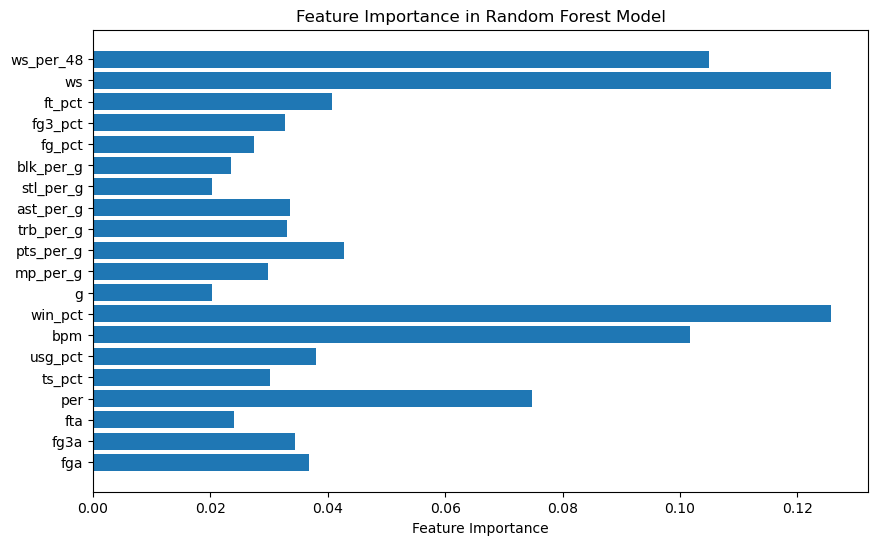

In [34]:
feature_importance = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()


In [35]:
#Logisic Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import statsmodels.api as sm
X = data[['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
     'win_pct', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48']]
Y= data['MVP']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter = 1000)

model.fit(X_train, Y_train)

X_train_with_const = sm.add_constant(X_train) 
logit_model = sm.Logit(Y_train, X_train_with_const)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.079333
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                    MVP   No. Observations:                  509
Model:                          Logit   Df Residuals:                      488
Method:                           MLE   Df Model:                           20
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.6276
Time:                        16:15:05   Log-Likelihood:                -40.381
converged:                       True   LL-Null:                       -108.42
Covariance Type:            nonrobust   LLR p-value:                 2.791e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -153.4205     59.921     -2.560      0.010    -270.863     -35.978
fga            1.9219      1

In [49]:
test_data = pd.read_csv('test_data.csv')
test_data = test_data.dropna()
test_data.isnull().sum()

Unnamed: 0    0
fga           0
fg3a          0
fta           0
per           0
ts_pct        0
usg_pct       0
bpm           0
player        0
win_pct       0
g             0
mp_per_g      0
pts_per_g     0
trb_per_g     0
ast_per_g     0
stl_per_g     0
blk_per_g     0
fg_pct        0
fg3_pct       0
ft_pct        0
ws            0
ws_per_48     0
dtype: int64